# Contraste de grupos

In [ ]:
!pip install pingouin
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase7_BaseContrasteDeGrupos.sav
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase6_BaseEstadisticaDescriptiva.sav

## Visualización de datos

In [3]:
import pandas as pd

df = pd.read_spss("Clase7_BaseContrasteDeGrupos.sav")
df

,Código,Sexo,Pretest,Postest
0,001,Mujer,30.0,27.0
1,002,Hombre,24.0,23.0
2,003,Hombre,22.0,18.0
3,004,Mujer,30.0,18.0
4,005,Hombre,26.0,20.0
5,006,Mujer,24.0,25.0
6,007,Mujer,24.0,21.0
7,008,Mujer,22.0,17.0
8,009,Hombre,18.0,18.0
9,010,Mujer,28.0,26.0


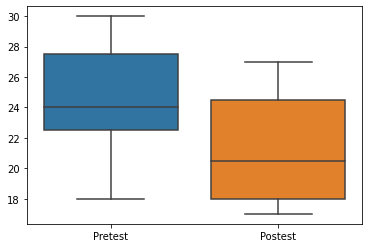

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()

## Descripción de los datos

In [26]:
df.describe()

,Pretest,Postest
count,10.000000,10.000000
mean,24.800000,21.300000
std,3.794733,3.713339
min,18.000000,17.000000
25%,22.500000,18.000000
50%,24.000000,20.500000
75%,27.500000,24.500000
max,30.000000,27.000000


## Análisis de normalidad

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

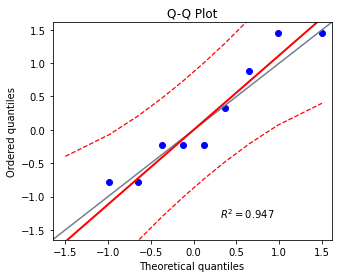

In [6]:
import pingouin as pg

pg.qqplot(df["Pretest"])

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

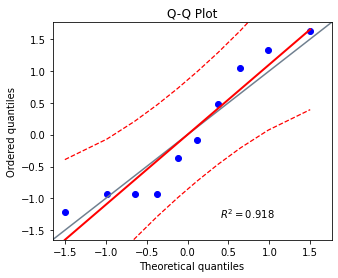

In [11]:
pg.qqplot(df["Postest"])

In [10]:
pg.normality(data=df, method="shapiro")

,W,pval,normal
Pretest,0.941810,0.573325,True
Postest,0.892359,0.180247,True


In [23]:
print("Postest")
print("Asimetría:", df["Postest"].skew())
print("Curtosis:", df["Postest"].kurtosis())

Postest
Asimetría: 0.42054972680350067
Curtosis: -1.5385767743013892


In [24]:
print("Pretest")
print("Asimetría:", df["Pretest"].skew())
print("Curtosis:", df["Pretest"].kurtosis())

Pretest
Asimetría: -0.11224133670350786
Curtosis: -0.3064373897707231


Ambas distribuciones se aproximan a la distribución normal. Por tanto, corresponde usar índice paramétrico t para dos muestras relacionadas.

## Contraste de muestras relacionadas

In [25]:
pg.ttest(df["Pretest"], df["Postest"], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.0,9,two-sided,0.014956,"[0.86, 6.14]",0.932275,4.498,0.746771


De acuerdo al análisis de contraste se observa una diferencia significativa en el puntaje de ansiedad entre la evaluación pre-test y la de post-test, t(9)=3.00, p=.02. De manera específica, se observa una reducción en ansiedad pre-test (M=24.8, DE=3.80) al post-test (M=21.3, DE=3.71) reportada por las/los participantes.

## Contraste de muestras independientes

In [29]:
df_ind = df[["Sexo", "Postest"]]
df_ind

,Sexo,Postest
0,Mujer,27.0
1,Hombre,23.0
2,Hombre,18.0
3,Mujer,18.0
4,Hombre,20.0
5,Mujer,25.0
6,Mujer,21.0
7,Mujer,17.0
8,Hombre,18.0
9,Mujer,26.0


In [44]:
df_ind.groupby("Sexo").describe()

Postest                                                     
         count       mean       std   min    25%   50%    75%   max
Sexo                                                               
Hombre     4.0  19.750000  2.362908  18.0  18.00  19.0  20.75  23.0
Mujer      6.0  22.333333  4.273952  17.0  18.75  23.0  25.75  27.0

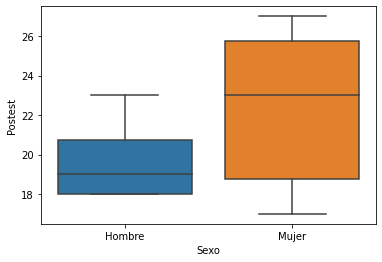

In [35]:
sns.boxplot(data=df_ind, x="Sexo", y="Postest")
plt.show()

In [71]:
pg.normality(data=df_ind, dv="Postest", group="Sexo", method="shapiro")

,W,pval,normal
Mujer,0.892472,0.331341,True
Hombre,0.848079,0.219999,True


Ambas distribuciones se aproximan a la normalidad. Corresponde usar índice paramétrico t para dos muestras independientes.

In [58]:
pg.homoscedasticity(data=df_ind, dv="Postest", group="Sexo")

,W,pval,equal_var
levene,3.512033,0.097797,True


El resultado de la prueba de Levene no es significativo, F=4.65, p=.06, por lo que se asumen varianzas iguales entre el grupo de mujeres y el de hombres.

In [72]:
hombre = df_ind.query('Sexo == "Hombre"')["Postest"]
mujer = df_ind.query('Sexo == "Mujer"')["Postest"]

pg.ttest(hombre, mujer, correction="False")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.088809,8,two-sided,0.307947,"[-8.05, 2.89]",0.702823,0.705,0.160991


No se observa una diferencia en ansiedad según el sexo de las y los participantes, t(8)=1.09, p=.31. Los puntajes de ansiedad reportados no difieren entre mujeres (M=22.33, DE=4.27) y hombres (M=19.75, DE=2.36).

## Contraste global

In [107]:
df2 = pd.read_spss("Clase6_BaseEstadisticaDescriptiva.sav")
df2

,Código,Sexo,Edad,EstadoCivil,NúmHermanos,OrdenHermanos,Religión,LugarNac,IntFamiliar,Instrucción,EstLaboral,EPA1,EPA2,EPA3,EPA4,EPA5,EPA6
0,001,Mujer,20.0,Soltero,2.0,1.0,Católica,Lima,4.0,Superior técnico incompleto,No,Muchas veces,Nunca,Algunas veces,Algunas veces,Muchas veces,Algunas veces
1,002,Hombre,18.0,Soltero,2.0,1.0,Católica,Lima,5.0,Superior universitario incompleto,Si,Siempre,Pocas veces,Muchas veces,Muchas veces,Muchas veces,Siempre
2,003,Hombre,19.0,Casado,3.0,2.0,Católica,Lima,5.0,Superior universitario incompleto,Si,Algunas veces,Algunas veces,Pocas veces,Pocas veces,Algunas veces,Pocas veces
3,004,Mujer,18.0,Soltero,3.0,2.0,Evangélico,Provincias,3.0,Superior universitario incompleto,Si,Siempre,Algunas veces,Pocas veces,Muchas veces,Algunas veces,Muchas veces
4,005,Hombre,19.0,Casado,2.0,2.0,Cristiana,Lima,5.0,Superior universitario incompleto,Si,Nunca,Nunca,Nunca,Pocas veces,Pocas veces,Nunca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,284,Hombre,20.0,Soltero,2.0,2.0,Católica,Lima,4.0,Superior universitario incompleto,Si,Algunas veces,Pocas veces,Algunas veces,Algunas veces,Muchas veces,Algunas veces
284,285,Hombre,21.0,Soltero,0.0,0.0,Católica,Lima,3.0,Superior universitario incompleto,Si,Muchas veces,Pocas veces,Algunas veces,Muchas veces,Muchas veces,Algunas veces
285,286,Hombre,19.0,Soltero,0.0,0.0,Católica,Provincias,7.0,Inicial,Si,Muchas veces,Pocas veces,Algunas veces,Pocas veces,Nunca,Algunas veces
286,287,Mujer,20.0,Soltero,3.0,2.0,Católica,Lima,6.0,Superior universitario incompleto,Si,Algunas veces,Nunca,Muchas veces,Muchas veces,Muchas veces,Nunca


In [108]:
code = {
    "Nunca": 1,
    "Pocas veces": 2,
    "Algunas veces": 3,
    "Muchas veces": 4,
    "Siempre": 5,
}
inv_code = {
    "Nunca": 5,
    "Pocas veces": 4,
    "Algunas veces": 3,
    "Muchas veces": 2,
    "Siempre": 1,
}
code_inst = {
    "Inicial": "Sin estudios, inicial o primaria",
    "Sin educación": "Sin estudios, inicial o primaria",
    "Secundaria incompleta": "Sin estudios, inicial o primaria",
    "Secundaria completa": "Secundaria",
    "Superior técnico incompleto": "Secundaria",
    "Superior técnico completo": "Superior técnica",
    "Superior universitario incompleto": "Secundaria",
    "Superior universitario completo": "Superior universitaria",
}

df2.replace(
    {
        "EPA1": code,
        "EPA2": code,
        "EPA3": inv_code,
        "EPA4": code,
        "EPA5": code,
        "EPA6": code,
        "Instrucción": code_inst,
    },
    inplace=True,
)

df2["Procastinacion"] = df2[
    ["EPA1", "EPA2", "EPA3", "EPA4", "EPA5", "EPA6"]
].mean(axis=1)

df2

,Código,Sexo,Edad,EstadoCivil,NúmHermanos,OrdenHermanos,Religión,LugarNac,IntFamiliar,Instrucción,EstLaboral,EPA1,EPA2,EPA3,EPA4,EPA5,EPA6,Procastinacion
0,001,Mujer,20.0,Soltero,2.0,1.0,Católica,Lima,4.0,Secundaria,No,4,1,3,3,4,3,3.000000
1,002,Hombre,18.0,Soltero,2.0,1.0,Católica,Lima,5.0,Secundaria,Si,5,2,2,4,4,5,3.666667
2,003,Hombre,19.0,Casado,3.0,2.0,Católica,Lima,5.0,Secundaria,Si,3,3,4,2,3,2,2.833333
3,004,Mujer,18.0,Soltero,3.0,2.0,Evangélico,Provincias,3.0,Secundaria,Si,5,3,4,4,3,4,3.833333
4,005,Hombre,19.0,Casado,2.0,2.0,Cristiana,Lima,5.0,Secundaria,Si,1,1,5,2,2,1,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,284,Hombre,20.0,Soltero,2.0,2.0,Católica,Lima,4.0,Secundaria,Si,3,2,3,3,4,3,3.000000
284,285,Hombre,21.0,Soltero,0.0,0.0,Católica,Lima,3.0,Secundaria,Si,4,2,3,4,4,3,3.333333
285,286,Hombre,19.0,Soltero,0.0,0.0,Católica,Provincias,7.0,"Sin estudios, inicial o primaria",Si,4,2,3,2,1,3,2.500000
286,287,Mujer,20.0,Soltero,3.0,2.0,Católica,Lima,6.0,Secundaria,Si,3,1,2,4,4,1,2.500000


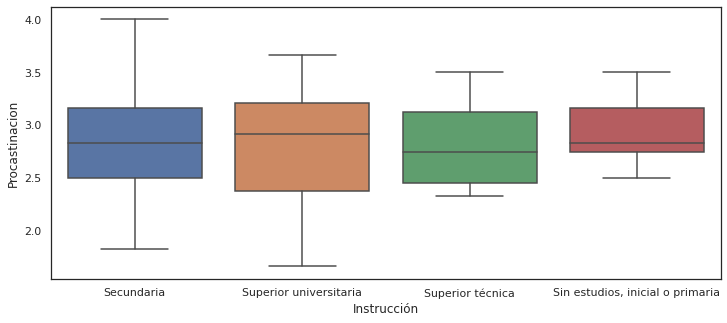

In [115]:
sns.set(rc={"figure.figsize": (12, 5)}, style="white")
sns.boxplot(x="Instrucción", y="Procastinacion", data=df2)
plt.show()

In [109]:
pg.anova(data=df2, dv="Procastinacion", between="Instrucción")

,Source,ddof1,ddof2,F,p-unc,np2
0,Instrucción,3,284,0.294027,0.829706,0.003096


No se encontraron diferencias significativas en procrastinación global según nivel de instrucción de las y los participantes, F(3,284) = 0.29, p = .83. Este resultado indicaría que la postergación de tareas o el dejar para después las actividades en el día a día no se distingue en función al nivel educativo reportado.

In [110]:
pg.pairwise_tukey(data=df2, dv="Procastinacion", between="Instrucción")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Secundaria,"Sin estudios, inicial o primaria",2.907063,2.952381,-0.045318,0.173250,-0.261575,0.993719,-0.099870
1,Secundaria,Superior técnica,2.907063,2.833333,0.073730,0.227939,0.323464,0.988284,0.162479
2,Secundaria,Superior universitaria,2.907063,2.770833,0.136230,0.162353,0.839094,0.835773,0.300222
3,"Sin estudios, inicial o primaria",Superior técnica,2.952381,2.833333,0.119048,0.283635,0.419721,0.975080,0.240525
4,"Sin estudios, inicial o primaria",Superior universitaria,2.952381,2.770833,0.181548,0.234204,0.775169,0.865646,0.377589
5,Superior técnica,Superior universitaria,2.833333,2.770833,0.062500,0.277114,0.225539,0.995947,0.127490
